In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [2]:
dataset = pd.read_csv("car_price_prediction.csv")
dataset.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
#Remove "km" from the end of each value in the 'Mileage' column
dataset['Mileage'] = dataset['Mileage'].str.rstrip('km')


In [4]:
dataset.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [5]:
# Convert the column to numeric values
dataset['Mileage'] = pd.to_numeric(dataset['Mileage'], errors='coerce')
dataset['Levy'] = pd.to_numeric(dataset['Levy'], errors='coerce')
dataset['Engine volume'] = pd.to_numeric(dataset['Engine volume'], errors='coerce')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              13418 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     17306 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# fill non with mean

In [7]:
# Calculate the mean of each column
mean_values = dataset['Levy'].mean()

# Replace NaN values with the mean of each column
dataset['Levy'].fillna(mean_values, inplace=True)

In [8]:
# Calculate the mean of each column
mean_values = dataset['Engine volume'].mean()

# Replace NaN values with the mean of each column
dataset['Engine volume'].fillna(mean_values, inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
brand_sum =dataset.groupby('Category')['Price'].sum()

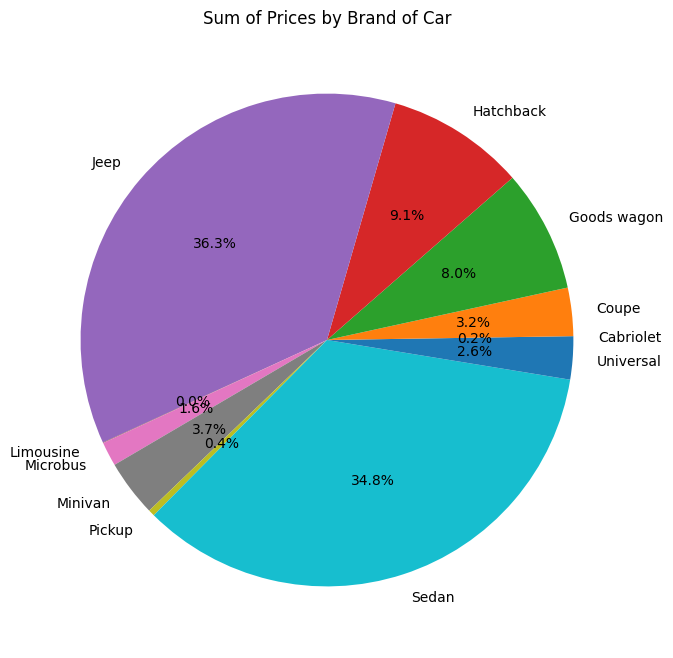

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(brand_sum,labels=brand_sum.index,autopct='%1.1f%%')
plt.title('Sum of Prices by Brand of Car')
plt.show()

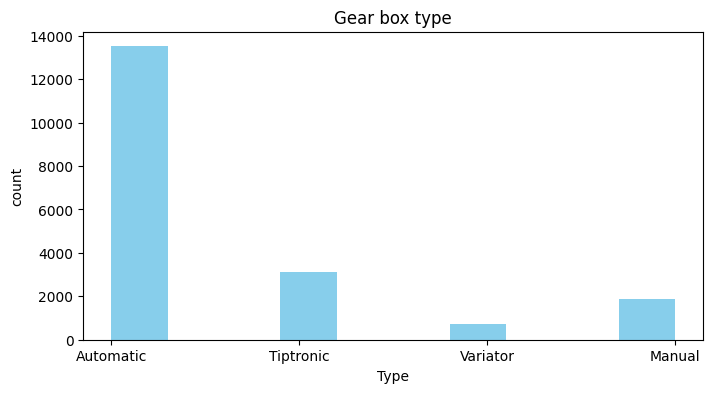

In [12]:
plt.figure(figsize=(8,4))
plt.hist(dataset['Gear box type'],color='skyblue')
plt.xlabel('Type')
plt.ylabel('count')
plt.title('Gear box type')
plt.show;

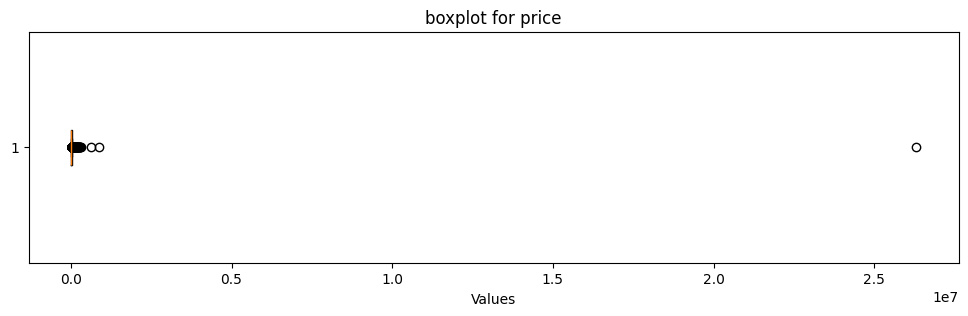

In [13]:
plt.figure(figsize=(12, 3))
plt.boxplot(dataset['Price'], vert=False)  # vert=False for horizontal boxplot
plt.title('boxplot for price')
plt.xlabel('Values')
plt.show()

# solve problem outliers in column price

In [14]:
# Detect outliers using the IQR method
Q1 = dataset['Price'].quantile(0.25)
Q3 = dataset['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers
outliers = (dataset['Price'] < lower_bound) | (dataset['Price'] > upper_bound)
dataset['Price'][outliers] = np.median(dataset['Price'][~outliers])


C:\Users\shehab\AppData\Local\Temp\ipykernel_13372\763083318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Price'][outliers] = np.median(dataset['Price'][~outliers])


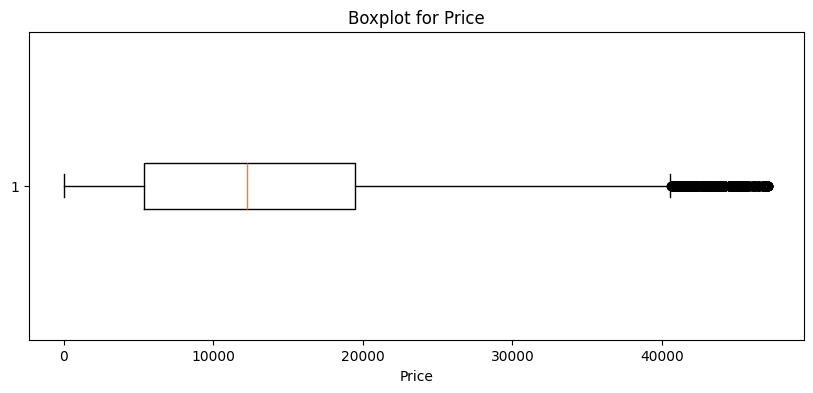

In [15]:
# Create a boxplot after replacing outliers
plt.figure(figsize=(10, 4))
plt.boxplot(dataset['Price'], vert=False)
plt.title('Boxplot for Price')
plt.xlabel('Price')
plt.show()

# drop unimportant featers

In [16]:
features_to_drop = ['Manufacturer','Model','Wheel','Color','Doors']
dataset = dataset.drop(columns=features_to_drop)

In [17]:
dataset.head()

,ID,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,45654403,13328,1399.000000,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12
1,44731507,16621,1018.000000,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8
2,45774419,8467,906.838128,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2
3,45769185,3607,862.000000,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0
4,45809263,11726,446.000000,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4


# change change nominal value to numerical

In [18]:
#enc = OneHotEncoder()
#enc_data = pd.DataFrame(enc.fit_transform( 
  #  dataset[['Category', 'Leather interior','Gear box type','Drive wheels','Fuel type']]).toarray()) 
label_encoder = LabelEncoder()
dataset['CategoryLE'] = label_encoder.fit_transform(dataset['Category'])
dataset['Leather interiorLE'] = label_encoder.fit_transform(dataset['Leather interior'])
dataset['Gear box typeLE'] = label_encoder.fit_transform(dataset['Gear box type'])
dataset['Drive wheelsLE'] = label_encoder.fit_transform(dataset['Drive wheels'])
dataset['Fuel typeLE'] = label_encoder.fit_transform(dataset['Fuel type'])

dataset.head()

,ID,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,45654403,13328,1399.000000,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,12,4,1,0,0,2
1,44731507,16621,1018.000000,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,8,4,0,2,0,5
2,45774419,8467,906.838128,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,2,3,0,3,1,5
3,45769185,3607,862.000000,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,0,4,1,0,0,2
4,45809263,11726,446.000000,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,3,1,0,1,5


In [19]:
features_to_drop = ['Category', 'Leather interior','Gear box type','Drive wheels','Fuel type','ID']
dataset = dataset.drop(columns=features_to_drop)


In [20]:
dataset.head()

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,13328,1399.000000,2010,3.5,186005,6.0,12,4,1,0,0,2
1,16621,1018.000000,2011,3.0,192000,6.0,8,4,0,2,0,5
2,8467,906.838128,2006,1.3,200000,4.0,2,3,0,3,1,5
3,3607,862.000000,2011,2.5,168966,4.0,0,4,1,0,0,2
4,11726,446.000000,2014,1.3,91901,4.0,4,3,1,0,1,5


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               19237 non-null  int64  
 1   Levy                19237 non-null  float64
 2   Prod. year          19237 non-null  int64  
 3   Engine volume       19237 non-null  float64
 4   Mileage             19237 non-null  int64  
 5   Cylinders           19237 non-null  float64
 6   Airbags             19237 non-null  int64  
 7   CategoryLE          19237 non-null  int32  
 8   Leather interiorLE  19237 non-null  int32  
 9   Gear box typeLE     19237 non-null  int32  
 10  Drive wheelsLE      19237 non-null  int32  
 11  Fuel typeLE         19237 non-null  int32  
dtypes: float64(3), int32(5), int64(4)
memory usage: 1.4 MB


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               19237 non-null  int64  
 1   Levy                19237 non-null  float64
 2   Prod. year          19237 non-null  int64  
 3   Engine volume       19237 non-null  float64
 4   Mileage             19237 non-null  int64  
 5   Cylinders           19237 non-null  float64
 6   Airbags             19237 non-null  int64  
 7   CategoryLE          19237 non-null  int32  
 8   Leather interiorLE  19237 non-null  int32  
 9   Gear box typeLE     19237 non-null  int32  
 10  Drive wheelsLE      19237 non-null  int32  
 11  Fuel typeLE         19237 non-null  int32  
dtypes: float64(3), int32(5), int64(4)
memory usage: 1.4 MB


In [23]:
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your dataset and transform it
scaled_data = scaler.fit_transform(dataset)

# Convert the scaled data back to a DataFrame
scaled_dataset = pd.DataFrame(scaled_data, columns=dataset.columns)
scaled_dataset

,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,CategoryLE,Leather interiorLE,Gear box typeLE,Drive wheelsLE,Fuel typeLE
0,0.282837,0.112841,0.876543,0.175000,0.000087,0.333333,0.7500,0.4,1.0,0.000000,0.0,0.333333
1,0.352724,0.080072,0.888889,0.150000,0.000089,0.333333,0.5000,0.4,0.0,0.666667,0.0,0.833333
2,0.179673,0.070512,0.827160,0.065000,0.000093,0.200000,0.1250,0.3,0.0,1.000000,0.5,0.833333
3,0.076530,0.066655,0.888889,0.125000,0.000079,0.200000,0.0000,0.4,1.0,0.000000,0.0,0.333333
4,0.248838,0.030876,0.925926,0.065000,0.000043,0.200000,0.2500,0.3,1.0,0.000000,0.5,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0.179673,0.070512,0.740741,0.115649,0.000140,0.200000,0.3125,0.1,1.0,0.333333,1.0,0.000000
19233,0.332774,0.063989,0.888889,0.120000,0.000075,0.200000,0.5000,0.9,1.0,0.666667,0.5,0.833333
19234,0.554065,0.064419,0.876543,0.100000,0.000054,0.200000,0.2500,0.4,1.0,0.000000,0.5,0.166667
19235,0.113118,0.103294,0.839506,0.100000,0.000024,0.200000,0.2500,0.4,1.0,0.000000,0.5,0.166667


# train_test_split for New_df

In [24]:
features= scaled_dataset.iloc[:,1:]
target  = scaled_dataset.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
predictions = model.predict(X_test)

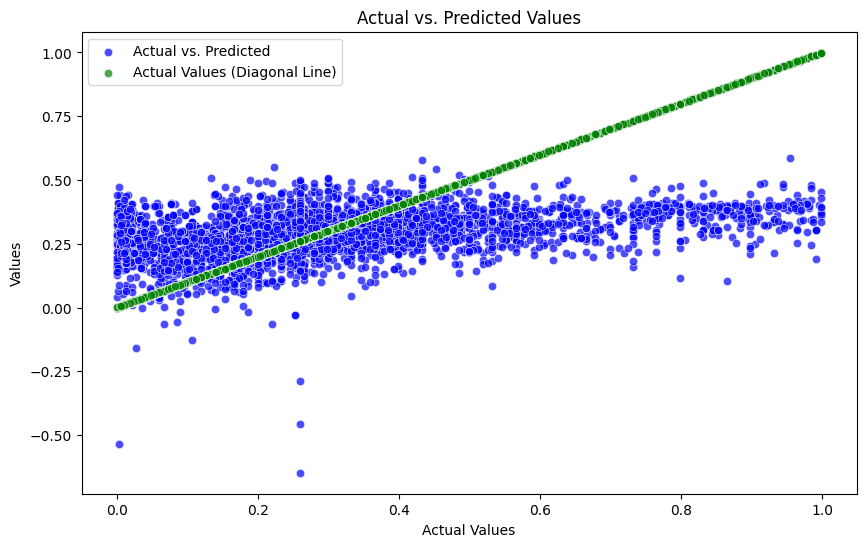

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Scatter plot for Actual vs. Predicted
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Actual', y='Predicted', data=results, color='blue', alpha=0.7, label='Actual vs. Predicted')
sns.scatterplot(x='Actual', y='Actual', data=results, color='green', alpha=0.7, label='Actual Values (Diagonal Line)')

plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Values')
plt.legend()
plt.show()



In [29]:
result_comparison = np.concatenate(
    (
        y_test.values.reshape(len(y_test), 1),
        predictions.reshape(len(predictions), 1)
    ),
    axis=1
)

In [30]:
result_comparison

array([[0.57902332, 0.24809371],
       [0.21961417, 0.22141626],
       [0.86521361, 0.10398346],
       ...,
       [0.00664276, 0.25897474],
       [0.29856321, 0.23046772],
       [0.33277446, 0.3364083 ]])

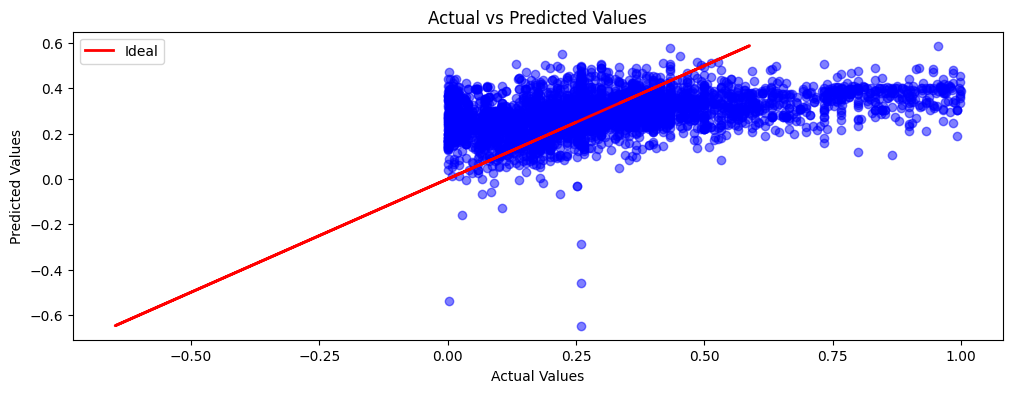

In [31]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(12, 4))

plt.scatter(result_comparison[:, 0], result_comparison[:, 1], color='blue', alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Plot a diagonal line for reference
plt.plot(result_comparison[:, 1], result_comparison[:, 1], color='red', linestyle='-', linewidth=2, label='Ideal')

plt.legend()
plt.show()

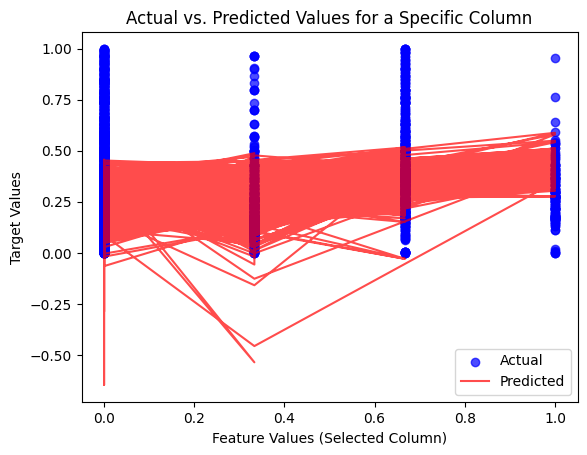

In [32]:
# Extract the first column from X_test (or choose the column you want to visualize)
column_to_visualize = X_test.iloc[:, 8]

# Scatter plot for Actual vs. Predicted for the selected column
plt.scatter(column_to_visualize, y_test, color='blue', label='Actual', alpha=0.7)
plt.plot(column_to_visualize, predictions, color='red', label='Predicted', alpha=0.7)
plt.title('Actual vs. Predicted Values for a Specific Column')
plt.xlabel('Feature Values (Selected Column)')
plt.ylabel('Target Values')
plt.legend()
plt.show()

In [33]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
mse

0.04725326566075518

In [34]:
# Calculate R-squared
r2 = r2_score(y_test, predictions)
r2

0.14408407789632982

In [35]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
mae

0.16796064634153068

# Hourly Vehicle Crossing data for Time Series
# from kaggel:https://www.kaggle.com/datasets/ddosad/vehicle-accidents

In [36]:
dataset=pd.read_csv("Vehicle.csv")
dataset.head()

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Hour      1689 non-null   int64
 1   Vehicles  1689 non-null   int64
dtypes: int64(2)
memory usage: 26.5 KB


 # train_test_split

In [38]:
features= dataset.iloc[:,:-1]
target  = dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [39]:
reg=LinearRegression()

In [40]:
reg.fit(X_train,y_train)

LinearRegression()

In [46]:
prediction=reg.predict(X_test)

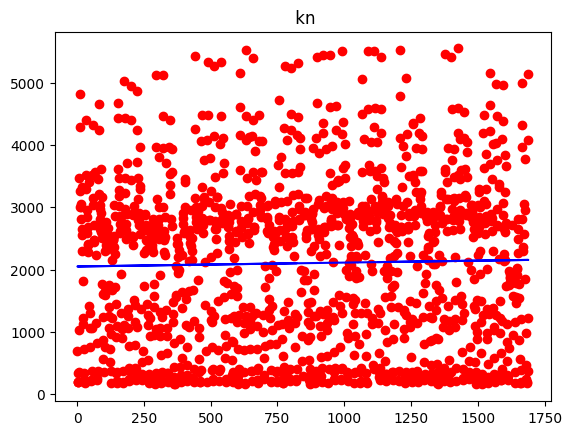

In [45]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,reg.predict(X_train),color='b')
plt.title(" kn")
plt.show()

In [47]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, prediction)
mse

1795580.2766212623

In [50]:
# Calculate R-squared
r2 = r2_score(y_test, prediction)
r2

-0.025795660589637004

In [51]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, prediction)
mae

1147.0651227035612